In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import GRU,SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',infer_datetime_format=True,low_memory=True)

In [ ]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [ ]:
df=pd.get_dummies(data=df, columns=['cbwd'])

In [ ]:
df['Date']=pd.to_datetime(df[['day','month','year','hour']])

In [ ]:
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Date
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31 22:00:00


In [ ]:
df=df.drop(columns=['year','No','day','hour','month'])

In [ ]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,Date
0,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0,2010-01-01 00:00:00
1,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0,2010-01-01 01:00:00
2,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0,2010-01-01 02:00:00
3,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0,2010-01-01 03:00:00
4,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0,2014-12-31 19:00:00
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0,2014-12-31 20:00:00
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0,2014-12-31 21:00:00
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0,2014-12-31 22:00:00


In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
Date,,,,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0


In [ ]:
df=df.fillna(method='bfill')

In [ ]:
df.isna().sum()

pm2.5      0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NE    0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64

In [ ]:
df.describe()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.722504,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916,0.114024,0.322882,0.348896,0.214198
std,91.415963,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867,0.317844,0.467584,0.476626,0.410269
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,138.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df=df.reset_index(drop=True)
df

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,129.0,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,129.0,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,129.0,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,129.0,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


In [ ]:
df=df.drop(columns=['TEMP'])

In [ ]:
df

,pm2.5,DEWP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,129.0,-21,1021.0,1.79,0,0,0,1,0,0
1,129.0,-21,1020.0,4.92,0,0,0,1,0,0
2,129.0,-21,1019.0,6.71,0,0,0,1,0,0
3,129.0,-21,1019.0,9.84,0,0,0,1,0,0
4,129.0,-20,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
43819,8.0,-23,1034.0,231.97,0,0,0,1,0,0
43820,10.0,-22,1034.0,237.78,0,0,0,1,0,0
43821,10.0,-22,1034.0,242.70,0,0,0,1,0,0
43822,8.0,-22,1034.0,246.72,0,0,0,1,0,0


 # Splitting

In [ ]:
def traintest_split(dataset):
    x=35064
    train_data=dataset[:x]
    test_data=dataset[x:]
    return train_data,test_data

In [ ]:
print("Time-series hourly data")
train_data,test_data=traintest_split(df)
print(train_data.shape)
print(test_data.shape)

Time-series hourly data
(35064, 10)
(8760, 10)


# **Scaling**

In [ ]:
def scaling(train,test):
  scaler=MinMaxScaler(feature_range=(0,1))
  a=scaler.fit_transform(train)
  b=scaler.transform(test)
  return a,b

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
a=scaler.fit_transform(train_data)
b=scaler.transform(test_data)

In [ ]:
scaled_train_data,scaled_test_data=scaling(train_data,test_data)

In [ ]:
print(scaled_train_data.shape)
print(scaled_test_data.shape)

(35064, 10)
(8760, 10)


# **Supervised Form**

In [ ]:
def series_to_supervised(dataset,look_back,horizon):
  x=[]
  y=[]
  for i in range(len(dataset)):
    # find the end of this pattern
    end_ix = i + look_back
    # check if we are beyond the dataset
    if end_ix > len(dataset)-horizon:
      break
    # gather input and output parts of the pattern
    data_x, data_y = dataset[i:end_ix,0:], dataset[end_ix:end_ix+horizon,0]
    x.append(data_x)
    y.append(data_y)
  return np.array(x), np.array(y)

In [ ]:
horizon=1
x_train1,y_train1=series_to_supervised(scaled_train_data,12,horizon)
x_test1,y_test1=series_to_supervised(scaled_test_data,12,horizon)

In [ ]:
x_train1.shape

(35052, 12, 10)

In [ ]:
x_train1= np.reshape(x_train1, (x_train1.shape[0],x_train1.shape[1],10))
x_test1= np.reshape(x_test1, (x_test1.shape[0],x_test1.shape[1],10))

In [ ]:
print("x_train  " + str(x_train1.shape))
print("y_train  " + str(y_train1.shape))
print("x_test  " + str(x_test1.shape))
print("y_test  " + str(y_test1.shape))

x_train  (35052, 12, 10)
y_train  (35052, 1)
x_test  (8748, 12, 10)
y_test  (8748, 1)


# **Loss Graph Function**

In [ ]:
def loss_graph(history):
  loss_train = history.history['loss']
  loss_val = history.history['val_loss']
  epochs = range(1,(len(loss_train))+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# RNN

In [ ]:
model1 = Sequential()
model1.add(SimpleRNN(16,return_sequences=True,input_shape=(12, 10)))
model1.add(SimpleRNN(8,return_sequences=False))
model1.add(Dense(1))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=opt,loss='mse')

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
history1=model1.fit(x_train1, y_train1, epochs=50,batch_size=32,validation_data=(x_test1,y_test1),callbacks=[es])

Epoch 1/50
1096/1096 [==============================] - 48s 14ms/step - loss: 0.0030 - val_loss: 6.5340e-04
Epoch 2/50
1096/1096 [==============================] - 15s 14ms/step - loss: 6.3766e-04 - val_loss: 5.1344e-04
Epoch 3/50
1096/1096 [==============================] - 15s 13ms/step - loss: 5.9379e-04 - val_loss: 5.2555e-04
Epoch 4/50
1096/1096 [==============================] - 15s 14ms/step - loss: 5.8617e-04 - val_loss: 4.8313e-04
Epoch 5/50
1096/1096 [==============================] - 15s 14ms/step - loss: 5.7783e-04 - val_loss: 4.7716e-04
Epoch 6/50
1096/1096 [==============================] - 16s 14ms/step - loss: 5.7550e-04 - val_loss: 4.7931e-04
Epoch 7/50
1096/1096 [==============================] - 15s 14ms/step - loss: 5.7191e-04 - val_loss: 4.7946e-04
Epoch 8/50
1096/1096 [==============================] - 15s 14ms/step - loss: 5.7411e-04 - val_loss: 4.9984e-04
Epoch 9/50
1096/1096 [==============================] - 15s 14ms/step - loss: 5.6661e-04 - val_loss: 4.7684e

### **Loss Graph**

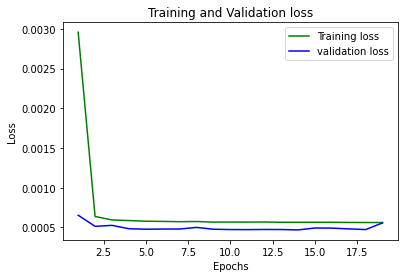

In [ ]:
loss_graph(history1)

# Train

In [ ]:
y_pred_train=model1.predict(x_train1)

In [ ]:
y_pred_train.shape

(35052, 1)

In [ ]:
forecast_copies = np.repeat(y_pred_train, x_train1.shape[2], axis=-1)
y_pred_train = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_train_predicted=pd.DataFrame(data=y_pred_train, columns=['Predicted_train'])

In [ ]:
actual_copies = np.repeat(y_train1, x_train1.shape[2], axis=-1)
y_actual_train = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_train_actual=pd.DataFrame(data=y_actual_train ,columns=['Actual_train'])
df_train_actual

,Actual_train
0,129.0
1,129.0
2,129.0
3,129.0
4,129.0
...,...
35047,22.0
35048,18.0
35049,23.0
35050,20.0


In [ ]:
df1=pd.concat([df_train_actual,df_train_predicted],axis=1)
df1

,Actual_train,Predicted_train
0,129.0,117.852005
1,129.0,117.225853
2,129.0,117.797302
3,129.0,117.342804
4,129.0,132.176712
...,...,...
35047,22.0,6.419683
35048,18.0,15.674696
35049,23.0,9.073693
35050,20.0,16.986572


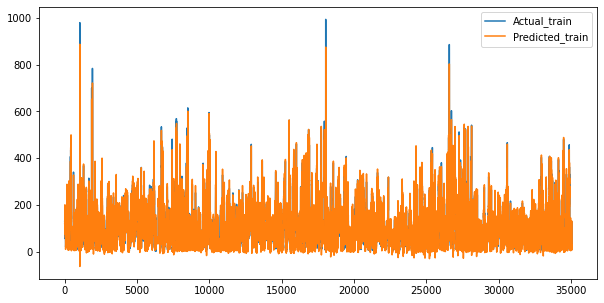

In [ ]:
df1.plot(figsize=(10,5))

In [ ]:
import math
trainScore = math.sqrt(mean_squared_error(df1['Actual_train'],df1['Predicted_train']))
print('Train Score: %.5f RMSE' % (trainScore))
trainScore1 =mean_squared_error(df1['Actual_train'],df1['Predicted_train'])
print('Train Score: %.5f MSE' % (trainScore1))

Train Score: 24.94695 RMSE
Train Score: 622.35020 MSE


# Test

In [ ]:
y_pred_test=model1.predict(x_test1)

In [ ]:
forecast_copies = np.repeat(y_pred_test, x_test1.shape[2], axis=-1)
y_pred_test = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_test_predicted=pd.DataFrame(data=y_pred_test, columns=['Predicted'])

In [ ]:
actual_copies = np.repeat(y_test1, x_test1.shape[2], axis=-1)
y_actual_test = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_test_actual=pd.DataFrame(data=y_actual_test ,columns=['Actual'])
df_test_actual

,Actual
0,23.0
1,28.0
2,23.0
3,24.0
4,26.0
...,...
8743,8.0
8744,10.0
8745,10.0
8746,8.0


In [ ]:
df2=pd.concat([df_test_actual,df_test_predicted],axis=1)
df2

,Actual,Predicted
0,23.0,21.310568
1,28.0,11.995173
2,23.0,21.258636
3,24.0,14.896322
4,26.0,15.344246
...,...,...
8743,8.0,7.340520
8744,10.0,3.770010
8745,10.0,8.238549
8746,8.0,6.622224


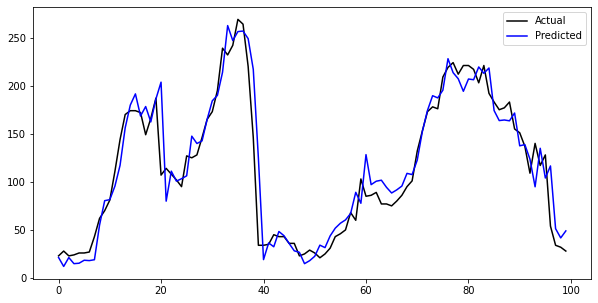

In [ ]:
df2['Actual'][:100].plot(figsize=(10,5),c='black',label='Actual')
df2['Predicted'][:100].plot(figsize=(10,5),c='blue',label='Predicted')
plt.legend()
plt.show()

In [ ]:
import math
testScore = math.sqrt(mean_squared_error(df2['Actual'],df2['Predicted']))
print('Test Score: %.2f RMSE' % (testScore))
testScore1 =mean_squared_error(df2['Actual'],df2['Predicted'])
print('Test Score: %.2f MSE' % (testScore1))

Test Score: 23.45 RMSE
Test Score: 550.00 MSE


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import math
testScore2 = mean_absolute_error(df2['Actual'],df2['Predicted'])
print('Train Score: %.5f MAE' % (testScore2))

Train Score: 14.82814 MAE


# LSTM

In [ ]:
model2 = Sequential()
model2.add(LSTM(16,activation='tanh',return_sequences=True,input_shape=(12, 10)))
model2.add(LSTM(8,activation='tanh',return_sequences=False)) 
model2.add(Dense(1))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt,loss='mse')

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
history2=model2.fit(x_train1, y_train1, epochs=50,batch_size=32,validation_data=(x_test1,y_test1),callbacks=[es])

Epoch 1/50
1096/1096 [==============================] - 10s 5ms/step - loss: 0.0045 - val_loss: 9.7008e-04
Epoch 2/50
1096/1096 [==============================] - 5s 5ms/step - loss: 9.1942e-04 - val_loss: 6.5670e-04
Epoch 3/50
1096/1096 [==============================] - 5s 5ms/step - loss: 7.0745e-04 - val_loss: 5.8399e-04
Epoch 4/50
1096/1096 [==============================] - 5s 5ms/step - loss: 6.2739e-04 - val_loss: 4.8582e-04
Epoch 5/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.9066e-04 - val_loss: 5.1626e-04
Epoch 6/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.7227e-04 - val_loss: 4.6819e-04
Epoch 7/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.6300e-04 - val_loss: 4.6401e-04
Epoch 8/50
1096/1096 [==============================] - 6s 5ms/step - loss: 5.5742e-04 - val_loss: 4.6484e-04
Epoch 9/50
1096/1096 [==============================] - 6s 5ms/step - loss: 5.5343e-04 - val_loss: 4.4917e-04
Epoch 10/50
1

### **Loss Graph**

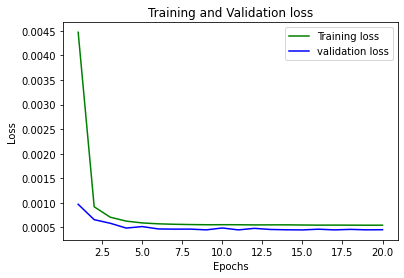

In [ ]:
loss_graph(history2)

# Train

In [ ]:
y_pred_train=model2.predict(x_train1)

In [ ]:
forecast_copies = np.repeat(y_pred_train, x_train1.shape[2], axis=-1)
y_pred_train = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_train_predicted=pd.DataFrame(data=y_pred_train, columns=['Predicted_train'])

In [ ]:
actual_copies = np.repeat(y_train1, x_train1.shape[2], axis=-1)
y_actual_train = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_train_actual=pd.DataFrame(data=y_actual_train ,columns=['Actual_train'])
df_train_actual

,Actual_train
0,129.0
1,129.0
2,129.0
3,129.0
4,129.0
...,...
35047,22.0
35048,18.0
35049,23.0
35050,20.0


In [ ]:
df3=pd.concat([df_train_actual,df_train_predicted],axis=1)
df3

,Actual_train,Predicted_train
0,129.0,124.650749
1,129.0,122.520584
2,129.0,124.454521
3,129.0,123.642456
4,129.0,129.826889
...,...,...
35047,22.0,18.000069
35048,18.0,25.190084
35049,23.0,18.039858
35050,20.0,24.440868


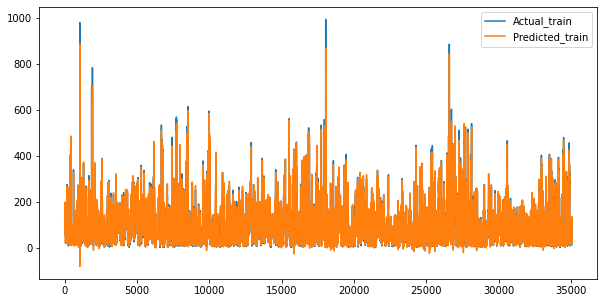

In [ ]:
df3.plot(figsize=(10,5))

In [ ]:
import math
trainScore = math.sqrt(mean_squared_error(df3['Actual_train'],df3['Predicted_train']))
print('Train Score: %.5f RMSE' % (trainScore))
trainScore1 =mean_squared_error(df3['Actual_train'],df3['Predicted_train'])
print('Train Score: %.5f MSE' % (trainScore1))

Train Score: 22.97358 RMSE
Train Score: 527.78558 MSE


# Test

In [ ]:
y_pred_test=model2.predict(x_test1)

In [ ]:
forecast_copies = np.repeat(y_pred_test, x_test1.shape[2], axis=-1)
y_pred_test = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_test_predicted=pd.DataFrame(data=y_pred_test, columns=['Predicted'])

In [ ]:
actual_copies = np.repeat(y_test1, x_test1.shape[2], axis=-1)
y_actual_test = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_test_actual=pd.DataFrame(data=y_actual_test ,columns=['Actual'])
df_test_actual

,Actual
0,23.0
1,28.0
2,23.0
3,24.0
4,26.0
...,...
8743,8.0
8744,10.0
8745,10.0
8746,8.0


In [ ]:
df4=pd.concat([df_test_actual,df_test_predicted],axis=1)
df4

,Actual,Predicted
0,23.0,32.539387
1,28.0,27.145588
2,23.0,31.368526
3,24.0,27.567556
4,26.0,28.239588
...,...,...
8743,8.0,14.383576
8744,10.0,10.610170
8745,10.0,14.504669
8746,8.0,13.741716


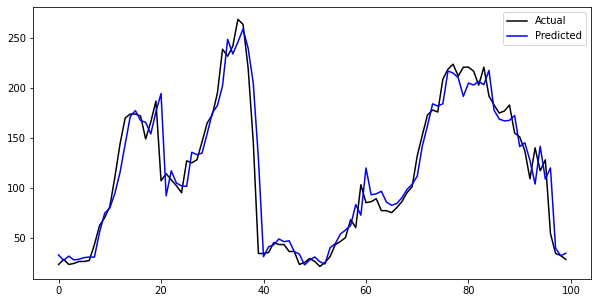

In [ ]:
df4['Actual'][:100].plot(figsize=(10,5),c='black',label='Actual')
df4['Predicted'][:100].plot(figsize=(10,5),c='blue',label='Predicted')
plt.legend()
plt.show()

In [ ]:
import math
testScore = math.sqrt(mean_squared_error(df4['Actual'],df4['Predicted']))
print('Test Score: %.2f RMSE' % (testScore))
testScore1 =mean_squared_error(df4['Actual'],df4['Predicted'])
print('Test Score: %.2f MSE' % (testScore1))

Test Score: 21.14 RMSE
Test Score: 447.06 MSE


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import math
testScore2 = mean_absolute_error(df4['Actual'],df4['Predicted'])
print('Train Score: %.2f MAE' % (testScore2))

Train Score: 12.08 MAE


# GRU

In [ ]:
model3 = Sequential()
model3.add(GRU(16,activation='tanh',return_sequences=True,input_shape=(12, 10)))
model3.add(GRU(8,activation='tanh',return_sequences=False))
model3.add(Dense(1))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=opt,loss='mse')

In [ ]:
es=EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [ ]:
history3=model3.fit(x_train1, y_train1, epochs=50,batch_size=32,validation_data=(x_test1,y_test1),callbacks=[es])

Epoch 1/50
1096/1096 [==============================] - 8s 5ms/step - loss: 0.0073 - val_loss: 8.8547e-04
Epoch 2/50
1096/1096 [==============================] - 5s 5ms/step - loss: 8.9082e-04 - val_loss: 6.4577e-04
Epoch 3/50
1096/1096 [==============================] - 5s 5ms/step - loss: 7.0208e-04 - val_loss: 5.2155e-04
Epoch 4/50
1096/1096 [==============================] - 5s 5ms/step - loss: 6.2144e-04 - val_loss: 5.8463e-04
Epoch 5/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.9057e-04 - val_loss: 5.2001e-04
Epoch 6/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.7565e-04 - val_loss: 4.8791e-04
Epoch 7/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.6842e-04 - val_loss: 4.8164e-04
Epoch 8/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.6406e-04 - val_loss: 4.7680e-04
Epoch 9/50
1096/1096 [==============================] - 5s 5ms/step - loss: 5.6218e-04 - val_loss: 5.0065e-04
Epoch 10/50
10

### **Loss Graph**

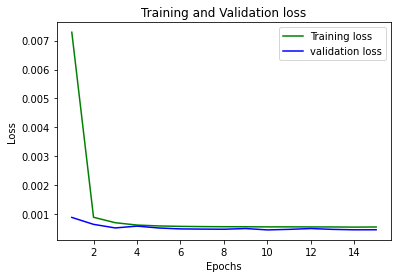

In [ ]:
loss_graph(history3)

# Train

In [ ]:
y_pred_train=model3.predict(x_train1)

In [ ]:
forecast_copies = np.repeat(y_pred_train, x_train1.shape[2], axis=-1)
y_pred_train = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_train_predicted=pd.DataFrame(data=y_pred_train, columns=['Predicted_train'])

In [ ]:
actual_copies = np.repeat(y_train1, x_train1.shape[2], axis=-1)
y_actual_train = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_train_actual=pd.DataFrame(data=y_actual_train ,columns=['Actual_train'])
df_train_actual

,Actual_train
0,129.0
1,129.0
2,129.0
3,129.0
4,129.0
...,...
35047,22.0
35048,18.0
35049,23.0
35050,20.0


In [ ]:
df5=pd.concat([df_train_actual,df_train_predicted],axis=1)
df5

,Actual_train,Predicted_train
0,129.0,127.848427
1,129.0,125.750816
2,129.0,127.284409
3,129.0,126.818802
4,129.0,132.009964
...,...,...
35047,22.0,19.186569
35048,18.0,27.397079
35049,23.0,19.391438
35050,20.0,26.505167


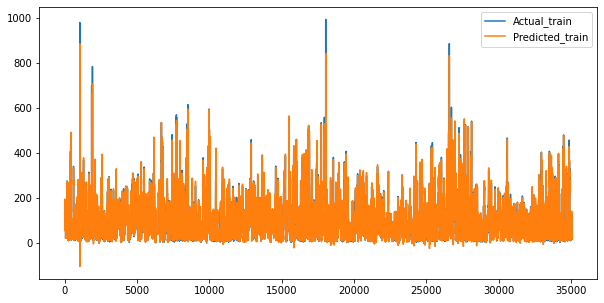

In [ ]:
df5.plot(figsize=(10,5))

In [ ]:
import math
trainScore = math.sqrt(mean_squared_error(df5['Actual_train'],df5['Predicted_train']))
print('Train Score: %.5f RMSE' % (trainScore))
trainScore1 =mean_squared_error(df5['Actual_train'],df5['Predicted_train'])
print('Train Score: %.5f MSE' % (trainScore1))

Train Score: 23.08795 RMSE
Train Score: 533.05335 MSE


# Test

In [ ]:
y_pred_test=model3.predict(x_test1)

In [ ]:
forecast_copies = np.repeat(y_pred_test, x_test1.shape[2], axis=-1)
y_pred_test = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
df_test_predicted=pd.DataFrame(data=y_pred_test, columns=['Predicted'])

In [ ]:
actual_copies = np.repeat(y_test1, x_test1.shape[2], axis=-1)
y_actual_test = scaler.inverse_transform(actual_copies)[:,0]

In [ ]:
df_test_actual=pd.DataFrame(data=y_actual_test ,columns=['Actual'])
df_test_actual

,Actual
0,23.0
1,28.0
2,23.0
3,24.0
4,26.0
...,...
8743,8.0
8744,10.0
8745,10.0
8746,8.0


In [ ]:
df6=pd.concat([df_test_actual,df_test_predicted],axis=1)
df6

,Actual,Predicted
0,23.0,34.740871
1,28.0,29.167728
2,23.0,33.614090
3,24.0,29.316408
4,26.0,30.202612
...,...,...
8743,8.0,14.333105
8744,10.0,9.652924
8745,10.0,14.041128
8746,8.0,13.367415


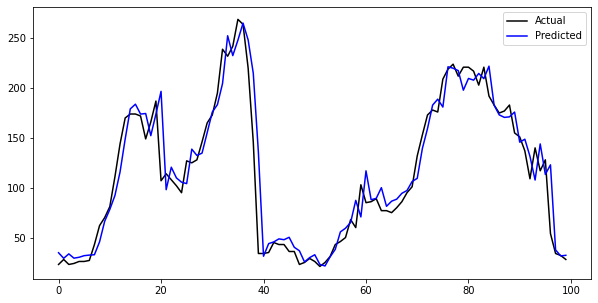

In [ ]:
df6['Actual'][:100].plot(figsize=(10,5),c='black',label='Actual')
df6['Predicted'][:100].plot(figsize=(10,5),c='blue',label='Predicted')
plt.legend()
plt.show()

In [ ]:
import math
testScore = math.sqrt(mean_squared_error(df6['Actual'],df6['Predicted']))
print('Test Score: %.2f RMSE' % (testScore))
testScore1 =mean_squared_error(df6['Actual'],df6['Predicted'])
print('Test Score: %.2f MSE' % (testScore1))

Test Score: 21.28 RMSE
Test Score: 452.95 MSE


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
import math
testScore2 = mean_absolute_error(df2['Actual'],df2['Predicted'])
print('Test Score: %.2f MAE' % (testScore2))

Test Score: 12.25 MAE
